# <center>Mid course project</center>

Analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with project_transactions.csv and briefly take a look at product.csv.

First, read in the transactions data and explore it.

Take a look at the raw data, the datatypes, and cast DAY, QUANTITY, STORE_ID, and WEEK_NO columns to the smallest appropriate datatype. Check the memory reduction by doing so.
Is there any missing data?
How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [1]:
import pandas as pd
import numpy as np

In [2]:
transactions_df =pd.read_csv("project data/project_transactions.csv",
                             dtype={"DAY":"Int16","QUANTITY":"Int32","STORE_ID":"Int32","WEEK_NO":"Int8"})

In [3]:
#reduced memory usage
transactions_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                Int16  
 3   PRODUCT_ID         int64  
 4   QUANTITY           Int32  
 5   SALES_VALUE        float64
 6   STORE_ID           Int32  
 7   RETAIL_DISC        float64
 8   WEEK_NO            Int8   
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: Int16(1), Int32(2), Int8(1), float64(4), int64(3)
memory usage: 145.3 MB


In [4]:
transactions_df.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,2884715.0,101.0,3.0,-734.0,-1.0,56.0,-0.0,-0.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0,9122.0,1.0,27.0,0.0,0.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0,1.0,-130.0,1.0,-56.0,-8.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0,330.0,-1.0,33.0,0.0,0.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0,372.0,0.0,57.0,0.0,0.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0,422.0,0.0,80.0,0.0,0.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0,34280.0,4.0,102.0,0.0,0.0


In [5]:
#check the missing value count
transactions_df.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [6]:
# Calculate unique households in dataset with nunique (describe could also be used)

transactions_df["household_key"].nunique()

2099

In [7]:
# Calculate unique product_ids in dataset with nunique
transactions_df["PRODUCT_ID"].nunique()

84138

In [8]:
transactions_df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than one, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [9]:
transactions_df=(transactions_df.assign(total_discount =transactions_df["RETAIL_DISC"] + transactions_df["COUPON_DISC"],
                                      percentage_discount =(lambda x:(x["total_discount"]/x["SALES_VALUE"]).abs()
                                      )))
                                       

In [10]:
transactions_df

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79,1.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,0.00,102,0.0,0.0,0.00,0.000000
2146307,1598,42305362535,711,114102,1,8.89,3228,0.00,102,0.0,0.0,0.00,0.000000
2146308,1598,42305362535,711,133449,1,6.99,3228,0.00,102,0.0,0.0,0.00,0.000000
2146309,1598,42305362535,711,6923644,1,4.50,3228,-0.49,102,0.0,0.0,-0.49,0.108889


In [11]:
transactions_df.drop(["RETAIL_DISC","COUPON_DISC","COUPON_MATCH_DISC"],axis=1,inplace=True)

In [12]:
transactions_df

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.316667
...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,102,0.00,0.000000
2146307,1598,42305362535,711,114102,1,8.89,3228,102,0.00,0.000000
2146308,1598,42305362535,711,133449,1,6.99,3228,102,0.00,0.000000
2146309,1598,42305362535,711,6923644,1,4.50,3228,102,-0.49,0.108889


In [28]:
#If the percentage discount is greater than 1, set it equal to 1. If it is less than one, set it to 0.

transactions_df["percentage_discount"]=(transactions_df["percentage_discount"].
                                       where(transactions_df["percentage_discount"]<1,1.0)
                                       .where(transactions_df["percentage_discount"]>0,0))

In [29]:
transactions_df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,1.0
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,1.0
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,1.0
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,1.0
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.0


## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 
* What was the highest quantiy sold for a single item in a single row?

In [36]:
#total sales
transactions_df["SALES_VALUE"].sum().round(2)

6666243.5

In [37]:
#total discount
transactions_df["total_discount"].sum()

-1178658.0799999998

In [38]:
#overall percentage discount
transactions_df["total_discount"].sum()/transactions_df["SALES_VALUE"].sum()

-0.1768099350106248

In [39]:
#total quantity sold
transactions_df["QUANTITY"].sum()

216713611

In [41]:
#maximum quantity sold
transactions_df["QUANTITY"].max()

89638

In [43]:
#grab that above row from dataframe using argmax()

transactions_df.loc[transactions_df["QUANTITY"].argmax()]

household_key                  630.0
BASKET_ID              34749153595.0
DAY                            503.0
PRODUCT_ID                 6534178.0
QUANTITY                     89638.0
SALES_VALUE                    250.0
STORE_ID                       384.0
WEEK_NO                         73.0
total_discount                -13.45
percentage_discount              1.0
Name: 1442095, dtype: Float64

In [51]:
#total sales value per basket (sum of sales value / nunique basket_id).

(transactions_df["SALES_VALUE"].sum()/transactions_df["BASKET_ID"].nunique()).round(2)

28.62

In [52]:
#Total sales value per household (sum of sales value / nunique household_key).

(transactions_df["SALES_VALUE"].sum()/transactions_df["household_key"].nunique()).round(2)

3175.91

## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.

In [54]:
#Plot the distribution of total sales value purchased at the household level.

(transactions_df.groupby("household_key").agg({"SALES_VALUE":"sum"}))

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


<Axes: ylabel='Frequency'>

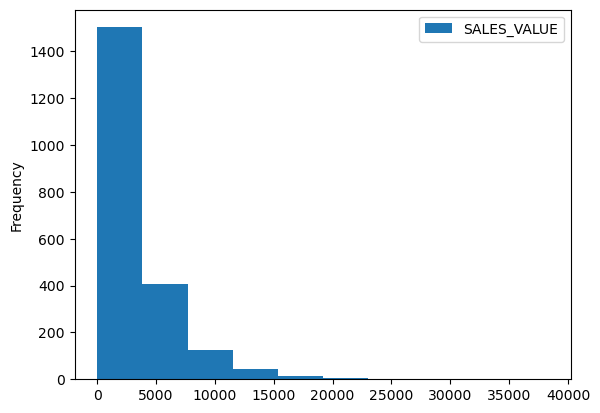

In [55]:
(transactions_df.groupby("household_key").agg({"SALES_VALUE":"sum"}).plot.hist())

In [56]:
# store top 10 households by total value and quantity
# groupby household_key, calculate sum of relevant columns by household
# sort both by relevant metric in descending order, and grab top 10 rows

transactions_df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,1.0
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,1.0
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,1.0
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,1.0
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.0


In [58]:
(transactions_df.groupby("household_key").agg({"SALES_VALUE":"sum"}))

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


In [62]:
top_10value = (transactions_df.
 groupby("household_key").agg({"SALES_VALUE":"sum"}).sort_values("SALES_VALUE",ascending=False).iloc[:10])

In [63]:
top_10value

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


In [65]:
top10_quantity =(transactions_df.
 groupby("household_key").agg({"QUANTITY":"sum"}).sort_values("QUANTITY",ascending=False).iloc[:10])

In [66]:
top10_quantity

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


In [71]:
#use multiple aggregation to create both in single table

(transactions_df.groupby("household_key").
 agg({"SALES_VALUE":"sum","QUANTITY":"sum"})
.sort_values("SALES_VALUE",ascending=False).describe())

,SALES_VALUE,QUANTITY
count,2099.000000,2099.0
mean,3175.914007,103246.122439
std,3287.043772,249354.098078
min,8.170000,5.0
25%,971.035000,767.0
50%,2145.710000,10179.0
75%,4295.395000,83700.0
max,38319.790000,4479917.0


<Axes: xlabel='household_key'>

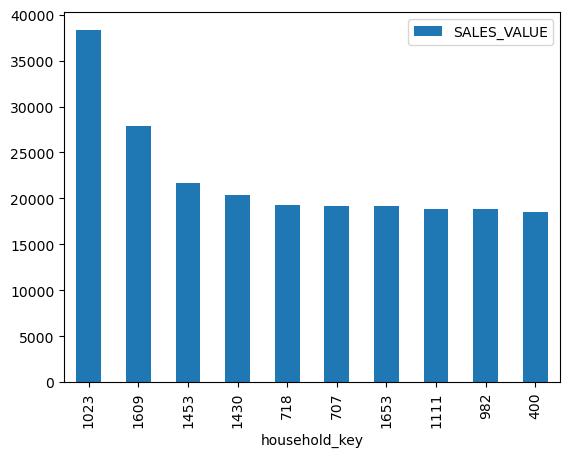

In [73]:
top_10value.plot.bar()

## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top selling items have a higher than average discount rate?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* What was the name most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the product name of the item that had the highest quantity sold in a single row.

In [76]:
top10_products = (transactions_df.groupby("PRODUCT_ID")
                 .agg({"SALES_VALUE":"sum"})
                  .sort_values("SALES_VALUE",ascending=False).iloc[:10])
                                                        

In [77]:
top10_products

,SALES_VALUE
PRODUCT_ID,
6534178,420154.13
6533889,42339.31
1029743,33894.75
1082185,24149.79
6533765,23831.14
6534166,23755.70
1106523,22931.01
916122,22749.02
995242,21229.72


<Axes: ylabel='PRODUCT_ID'>

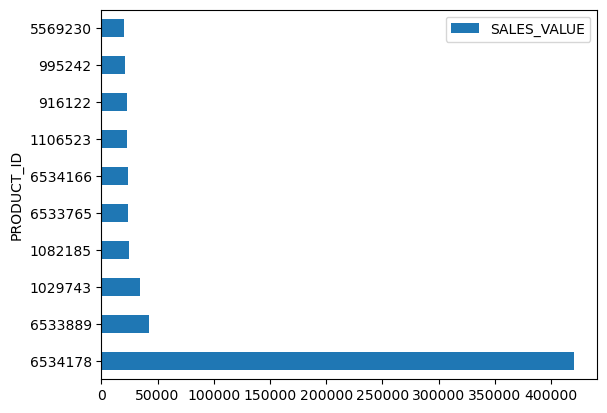

In [82]:
top10_products.plot.barh()

In [87]:
# Calculate the total discount for top 10 products
# Divide that by sales value for top 10 products

((transactions_df.query("PRODUCT_ID in @top10_products.index").
 loc[:,"total_discount"].sum())/
(transactions_df.query("PRODUCT_ID in @top10_products.index").
 loc[:,"SALES_VALUE"].sum())
)

-0.10331267387397927

In [91]:
#read in product data

products_df =pd.read_csv("project data/product.csv")

In [92]:
products_df.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [94]:
# Look up top 10 products for households in top10_value table
# Use query to reference index of top10_value to filter to relevant households
# Use value counts to get counts by product_id (this will be order in descending order)
# Then grab the top 10 products with iloc and extract the index to get product numbers


top_10value

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


In [95]:
transactions_df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,1.0
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,1.0
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,1.0
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,1.0
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.0


In [108]:
products = (transactions_df.query("household_key in @top_10value.index")
            .loc[:,"PRODUCT_ID"].value_counts().iloc[:10].index)

In [109]:
products

Int64Index([1082185, 1029743, 6534178, 6533889, 1127831,  951590,  860776,
            1106523,  981760, 9677202],
           dtype='int64')

In [110]:

products_df.query("PRODUCT_ID in @products")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
10630,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT
20973,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ
24250,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
40600,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
68952,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,


In [111]:
#products with highest quantity
top10_products

,SALES_VALUE
PRODUCT_ID,
6534178,420154.13
6533889,42339.31
1029743,33894.75
1082185,24149.79
6533765,23831.14
6534166,23755.70
1106523,22931.01
916122,22749.02
995242,21229.72


In [112]:
products_df.query("PRODUCT_ID == 6534178")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [114]:
#look up 10 product name for all customers

products_df.query("PRODUCT_ID  in @top10_products.index")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
16863,916122,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
53097,5569230,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
57171,6533765,69,KIOSK-GAS,Private,FUEL,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
